In [15]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [16]:
def forward(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Estart)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 200000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [17]:
def reverse(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Estart)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [18]:
def cut(Estart, Ec, region, totlen, Emm, Ecut, Estop):
    els = []
    for j in range(totlen):
        el = []
        el.append(Ec)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Estop)
        els.append(el)
    plsm = []
    for j in range(len(els)):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for i in range(len(els[j])-1):
            p = []
            z = 1 + np.exp(-els[j][i])+np.exp(els[j][i+1])
            p.append((1/(1+np.exp(Ecut))*np.exp(-els[j][i])/z))
            p.append((1/(1+np.exp(Ecut))*1/z))
            p.append((1/(1+np.exp(Ecut))*np.exp(els[j][i+1])/z))
            pls.append(p)
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)
    matrix_m = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            if i == len(plsm[j])-3:
                pcut = np.exp(Ecut)/(1+np.exp(Ecut))
                line.append(0)
                for l in range(len(plsm[j])-4):
                    line.append(pcut)
                line.append(1)
                matrix.append(line)
            else:
                for k in range(len(plsm[j])-2):
                    if k == i - 1:
                        line.append(plsm[j][k+1][2])
                    elif k == i:
                        line.append(plsm[j][k+1][1])
                    elif k == i + 1:
                        line.append(plsm[j][k+1][0])
                    else:
                        line.append(0)
                matrix.append(line)
        matrix_m.append(matrix)
    matrix_m = np.array(matrix_m)
    powered_matrix_array = []
    for j in range(len(matrix_m)):
        powered_matrix_array.append(LA.matrix_power(matrix_m[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [19]:
def cutrate(Estart, Ec, Ew1, Ew2, Emm, Ecut, stop1, stop2):
    totlen = 26
    region1 = [0, int(stop1)]
    region2 = [int(stop1), int(stop2)]
    region3 = [int(stop2), totlen]
    Estop = -1000000
    probs = [forward(Estart, Ec, Ew1, region1, totlen, Emm), reverse(Ec, Ec, Ew1, region1, totlen, Emm),
             forward(Ec, Ec, Ew2, region2, totlen, Emm), reverse(Ec, Ec, Ew2, region2, totlen, Emm),
        cut(Ec, Ec, region3, totlen, Emm, Ecut, Estop)]
    plsm = []
    for i in range(len(probs[0])):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for j in range(len(probs)):
            pls.append([1-probs[j][i], 0, probs[j][i]])
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)

    matrix_array = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            for k in range(len(plsm[j])-2):
                if k == i - 1:
                    line.append(plsm[j][k+1][2])
                elif k == i:
                    line.append(plsm[j][k+1][1])
                elif k == i + 1:
                    line.append(plsm[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)

    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 200000))

    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [20]:
bounds = [(0, 30), (0, 10), (-20, -6), (-20, -6), (-15, -5), (-30, -20), (12, 16), (23, 25)]

In [21]:
def minimizee(x):
    data_Cas13_2 = [0.102,  0.056,  0.156, 0.174, 0.257, 0.464, 0.544, 
             0.421, 0.314, 0, 0.024, 0.035, 0.039, 0.007, 0.044, 0.151,
             0.124, 0.186, 0.174, 0.266, 0.298, 0.037, 0.047, 0.053]
    pick = [0,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
    fit_probs = np.take(cutrate(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7]),
                        pick)
    return np.sum(np.square(np.subtract(data_Cas13_2, fit_probs)))

In [22]:
#Fitting
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 200, popsize = 30)

In [23]:
new_x = result.x

In [27]:
new_x = [ 5.93393432e+00,  1.36594149e+00, -1.50884690e+01, -2.06595065e-02,
       -5.08860894e+00, -2.03494072e+01,  1.52904752e+01,  2.37735609e+01]

In [28]:
full_length = cutrate(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4], new_x[5], new_x[6], new_x[7])
x = np.arange(1, 30, 1)

In [29]:
data_Cas13_2 = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
             [0.102, 0.358, 0.056, 2.348, 0.156, 0.174, 0.257, 0.464, 0.544, 
             0.421, 0.314, 0, 0.024, 0.035, 0.039, 0.007, 0.044, 0.151,
             0.124, 0.186, 0.174, 0.266, 0.298, 0.037, 0.047, 0.053],
            [0.038, 0.077, 0.029, 0.357, 0.043, 0.085, 0.085, 0.084, 0.087,
            0.065, 0.054, 0.046, 0.011, 0.036, 0.032, 0.001, 0.014, 0.041,
            0.039, 0.034, 0.044, 0.037, 0.05, 0.022, 0.026, 0.011]]

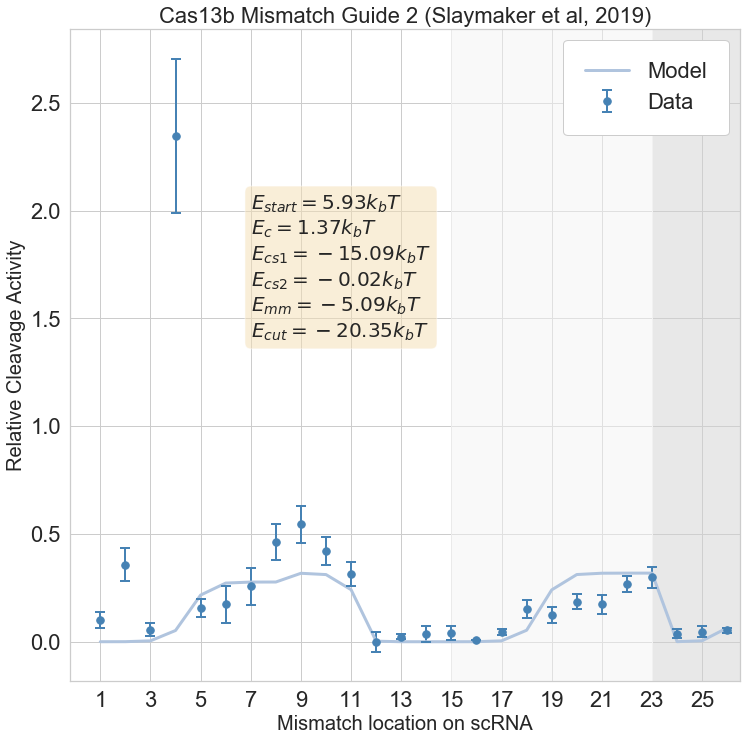

In [30]:
ax = plt.axes()
plt.plot(x[:26], full_length[:27], lw = 3, c = 'lightsteelblue', label = 'Model')
plt.errorbar(data_Cas13_2[0], data_Cas13_2[1], data_Cas13_2[2], fmt = '.', 
             ecolor = 'steelblue', capsize = 5, elinewidth = 2,
             capthick = 2, color = 'steelblue', ms = '15', label = 'Data')
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('Cas13b Mismatch Guide 2 (Slaymaker et al, 2019)', fontsize = 22)
plt.ylabel('Relative Cleavage Activity', fontsize = 20)
plt.xlabel('Mismatch location on scRNA', fontsize = 20)
plt.xlim(-0.2, 26.5)
plt.axvspan(15, 23, facecolor='whitesmoke', alpha=0.5)
plt.axvspan(23, 27, facecolor='lightgrey', alpha=0.5)
plt.xticks(np.arange(1, 27, 2))
plt.rcParams["figure.figsize"] = (12, 12)
first_legend = plt.legend(loc='upper right', fancybox =True, borderpad = 1, framealpha =1 )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    r'$E_{start}=%.2f$' % (new_x[0], ) + '$k_bT$',
    r'$E_{c}=%.2f$' % (new_x[1], ) + '$k_bT$',
    r'$E_{cs1}=%.2f$' % (new_x[2], ) + '$k_bT$', 
    r'$E_{cs2}=%.2f$' % (new_x[3], ) + '$k_bT$', r'$E_{mm}=%.2f$' % (new_x[4], ) + '$k_bT$',
    r'$E_{cut}=%.2f$' % (new_x[5], ) + '$k_bT$'))
ax.text(0.27, 0.75, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.show()